In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../input/train.csv", parse_dates=["order_date"])

# 년도별 DataFrame

In [3]:
year_2009 = data[data['order_date'] < '2010']
temp = data[data['order_date'] < '2011']
year_2010 = temp[temp['order_date'] > '2009-12-31']
year_2011 = data[data['order_date'] > '2010-12-31']
year_2011

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
422634,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,3.2175,13313,United Kingdom,32.1750
422635,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.6930,13313,United Kingdom,17.3250
422636,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.6930,13313,United Kingdom,17.3250
422637,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,3.4650,13313,United Kingdom,17.3250
422638,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,2.0625,13313,United Kingdom,20.6250
...,...,...,...,...,...,...,...,...,...
780497,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025
780498,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285
780499,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625
780500,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175


# 최근 거래가 없는 id의 확률을 0으로 만들어야 하지 않을까?
## 2009년 이후 거래가 없는 id 100명 -> 0 probability 0.004점 증가
### 모델의 예측값을 확인할 필요가 있어 보인다.


### 2009.12월 기준 1045명 (이전에 더 있었을 것)
### 2010년도 1045 - 921 = 124명 거래 없음
### 2011년도 4413 - 2696 = 1717명 거래 없음
### 2011년도 4197 - 2696 = 1501명 신규

In [4]:
print(len(year_2009.customer_id.unique()))
print(len(year_2010.customer_id.unique()))
print(len(year_2011.customer_id.unique()))

1045
4289
4197


In [5]:
customer_id_2009 = set(year_2009.customer_id.unique())
customer_id_2010 = set(year_2010.customer_id.unique())
customer_id_2011 = set(year_2011.customer_id.unique())

print(len(customer_id_2009 & customer_id_2010))
print(len(customer_id_2009 | customer_id_2010))
print(len((customer_id_2009 | customer_id_2010) & customer_id_2011))
print(len(customer_id_2010 & customer_id_2011))
print(len(customer_id_2009 & customer_id_2011))

921
4413
2696
2672
763


In [6]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3, venn3_circles

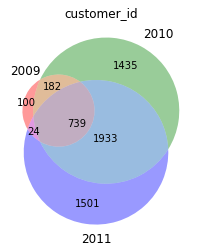

In [7]:
venn3([customer_id_2009, customer_id_2010, customer_id_2011], ('2009', '2010', '2011'))
plt.title('customer_id')
plt.show()

In [8]:
len((customer_id_2009 | customer_id_2010 | customer_id_2011) - customer_id_2011)

1717

In [10]:
away = list((customer_id_2009 | customer_id_2010 | customer_id_2011) - customer_id_2011)
away[:10]

[16388, 16390, 16391, 16396, 16397, 16408, 16410, 16417, 16420, 16421]

In [11]:
model_predict = pd.read_csv("/opt/ml/code/output/baseline3_time_diff.csv")

In [12]:
model_predict[model_predict.customer_id.isin(away)].describe()

,customer_id,probability
count,1717.000000,1717.000000
mean,15383.933023,0.083398
std,1699.455924,0.031531
min,12351.000000,0.055383
25%,13912.000000,0.063406
50%,15383.000000,0.072211
75%,16868.000000,0.092980
max,18286.000000,0.284632


In [13]:
away_2009 = list((customer_id_2009 | customer_id_2010 | customer_id_2011) - (customer_id_2011 | customer_id_2010))
len(away_2009)

100

In [56]:
for a in away_2009:
    model_predict.probability.loc[(model_predict.customer_id == a)] = 0

py
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [14]:
model_predict[model_predict.customer_id.isin(away_2009)].describe()

,customer_id,probability
count,100.000000,100.000000
mean,15704.880000,0.063367
std,1632.843039,0.006869
min,12443.000000,0.055383
25%,14547.500000,0.058496
50%,16031.500000,0.062130
75%,17066.250000,0.066204
max,18201.000000,0.086684


In [15]:
output_dir = '/opt/ml/code/output'
model_predict.to_csv(os.path.join(output_dir , f'b3_tdiff_zero_test.csv'), index=False)

In [5]:
len(data.customer_id.unique())

5914

In [9]:
year_2011_10 = data[data['order_date'] < '2011-11']

In [10]:
year_2011_10.tail()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
716265,573695,23557,LANDMARK FRAME BAKER STREET,2,2011-10-31 17:13:00,20.6250,15023,United Kingdom,41.2500
716266,573695,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-10-31 17:13:00,4.2075,15023,United Kingdom,134.6400
716267,573695,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-10-31 17:13:00,16.4175,15023,United Kingdom,32.8350
716268,573695,23543,WALL ART KEEP CALM,1,2011-10-31 17:13:00,13.6125,15023,United Kingdom,13.6125
716269,573695,23397,FOOT STOOL HOME SWEET HOME,4,2011-10-31 17:13:00,16.4175,15023,United Kingdom,65.6700


In [11]:
len(year_2011_10.customer_id.unique())

5722

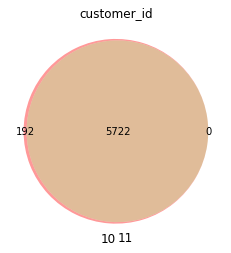

In [21]:
newbie = set(data.customer_id.unique()) - set(year_2011_10.customer_id.unique())
venn2([set(data.customer_id.unique()), set(year_2011_10.customer_id.unique())], ('10', '11'))
plt.title('customer_id')
plt.show()

In [22]:
len(newbie)

192

In [24]:
check = pd.read_csv("/opt/ml/code/output/baseline3_test.csv")

In [28]:
pd.set_option('display.max_row', 100)
check[check.customer_id.isin(newbie)].describe()

,customer_id,probability
count,192.000000,192.000000
mean,15416.354167,0.114782
std,1789.674763,0.061903
min,12452.000000,0.059627
25%,13840.000000,0.070451
50%,15456.500000,0.096962
75%,17113.250000,0.134801
max,18274.000000,0.543037


In [48]:
year_2011_11 = data[data['order_date'] > '2011-10-31 23:59:59']
new_order = year_2011_11[year_2011_11.customer_id.isin(newbie)]
new_order

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
716320,573747,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12,2011-11-01 09:14:00,2.0625,13697,United Kingdom,24.750
716321,573747,21479,WHITE SKULL HOT WATER BOTTLE,4,2011-11-01 09:14:00,7.0125,13697,United Kingdom,28.050
716322,573747,21824,PAINTED METAL STAR WITH HOLLY BELLS,24,2011-11-01 09:14:00,0.6435,13697,United Kingdom,15.444
716323,573747,22051,BLUE SCANDINAVIAN PAISLEY WRAP,25,2011-11-01 09:14:00,0.6930,13697,United Kingdom,17.325
716324,573747,22114,HOT WATER BOTTLE TEA AND SYMPATHY,4,2011-11-01 09:14:00,7.0125,13697,United Kingdom,28.050
...,...,...,...,...,...,...,...,...,...
780108,579837,23284,DOORMAT KEEP CALM AND COME IN,40,2011-11-30 16:18:00,11.6820,12882,United Kingdom,467.280
780109,579837,22692,DOORMAT WELCOME TO OUR HOME,20,2011-11-30 16:18:00,11.6820,12882,United Kingdom,233.640
780110,579837,21524,DOORMAT SPOTTY HOME SWEET HOME,10,2011-11-30 16:18:00,11.6820,12882,United Kingdom,116.820
780111,579837,48184,DOORMAT ENGLISH ROSE,10,2011-11-30 16:18:00,11.6820,12882,United Kingdom,116.820


In [55]:
new_order_300 = new_order[new_order.total > 300].customer_id.unique()

In [53]:
check[check.customer_id.isin(new_order_300)]

,customer_id,probability
252,12603,0.081158
529,12882,0.099047
2065,14424,0.080857
3211,15576,0.132166
3256,15621,0.092446
4138,16505,0.095170
4382,16751,0.130372
4943,17313,0.195814
5130,17500,0.091863
5153,17523,0.113842


In [60]:
year_2011_11[year_2011_11.customer_id.isin([18139])][:100]

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
759411,577745,22087,PAPER BUNTING WHITE LACE,40,2011-11-21 14:06:00,4.2075,18139,United Kingdom,168.300
759412,577745,22046,TEA PARTY WRAPPING PAPER,25,2011-11-21 14:06:00,0.6930,18139,United Kingdom,17.325
759413,577745,22708,WRAP DOLLY GIRL,25,2011-11-21 14:06:00,0.6930,18139,United Kingdom,17.325
759414,577745,23546,WRAP PAISLEY PARK,25,2011-11-21 14:06:00,0.6930,18139,United Kingdom,17.325
759415,577745,23230,WRAP ALPHABET DESIGN,25,2011-11-21 14:06:00,0.6930,18139,United Kingdom,17.325
759416,577745,23296,SET OF 6 TEA TIME BAKING CASES,24,2011-11-21 14:06:00,2.0625,18139,United Kingdom,49.500
759417,577745,21210,SET OF 72 RETROSPOT PAPER DOILIES,24,2011-11-21 14:06:00,2.3925,18139,United Kingdom,57.420
759418,577745,84991,60 TEATIME FAIRY CAKE CASES,24,2011-11-21 14:06:00,0.9075,18139,United Kingdom,21.780
759419,577745,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-11-21 14:06:00,0.9075,18139,United Kingdom,21.780
759420,577745,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2011-11-21 14:06:00,0.9075,18139,United Kingdom,21.780


In [62]:
len(data.description.unique())

5297

In [63]:
len(data.product_id.unique())

4645